In [24]:
from datetime import date
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [25]:
symbol = 'TQQQ'

# Get data on this ticker
ticker = yf.Ticker(symbol)

# TODO check if data is real and load from file if necessary
history = ticker.history(interval='1wk', start='2025-1-1', end=date.today())
# history = pd.read_csv('data/TQQQ-weekly-2022.csv').set_index('Date')

# display(history)

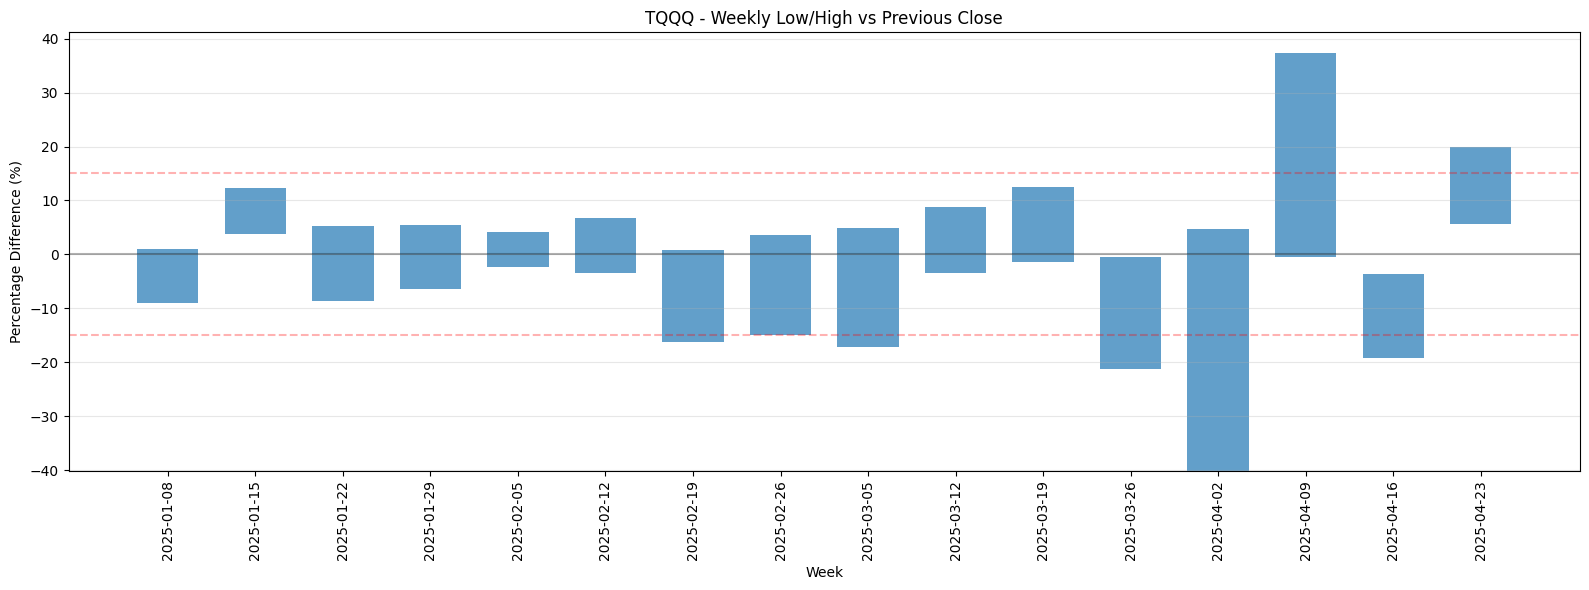

In [26]:
# Calculate percentage differences
history['PrevClose'] = history['Close'].shift(1)
history['LowDiff'] = (history['Low'] / history['PrevClose'] - 1) * 100
history['HighDiff'] = (history['High'] / history['PrevClose'] - 1) * 100
history['CloseDiff'] = (history['Close'] / history['PrevClose'] - 1) * 100

# Drop the first row which has NaN values for LowDiff and HighDiff
plot_data = history.dropna(subset=['LowDiff', 'HighDiff'])

# Create a figure and plot
plt.figure(figsize=(16, 6))

# Plot the bars
x = range(len(plot_data))
height = plot_data['HighDiff'] - plot_data['LowDiff']
plt.bar(x, height, bottom=plot_data['LowDiff'], width=0.7, alpha=0.7)

# Add horizontal line at 0%
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=15, color='red', linestyle='--', alpha=0.3)
plt.axhline(y=-15, color='red', linestyle='--', alpha=0.3)

# Format the plot
plt.title(f'{symbol} - Weekly Low/High vs Previous Close')
plt.xlabel('Week')
plt.ylabel('Percentage Difference (%)')
plt.grid(axis='y', alpha=0.3)

# Set x-tick labels to be the dates
plt.xticks(x, plot_data.index.strftime('%Y-%m-%d'), rotation=90)

plt.tight_layout()
plt.show()

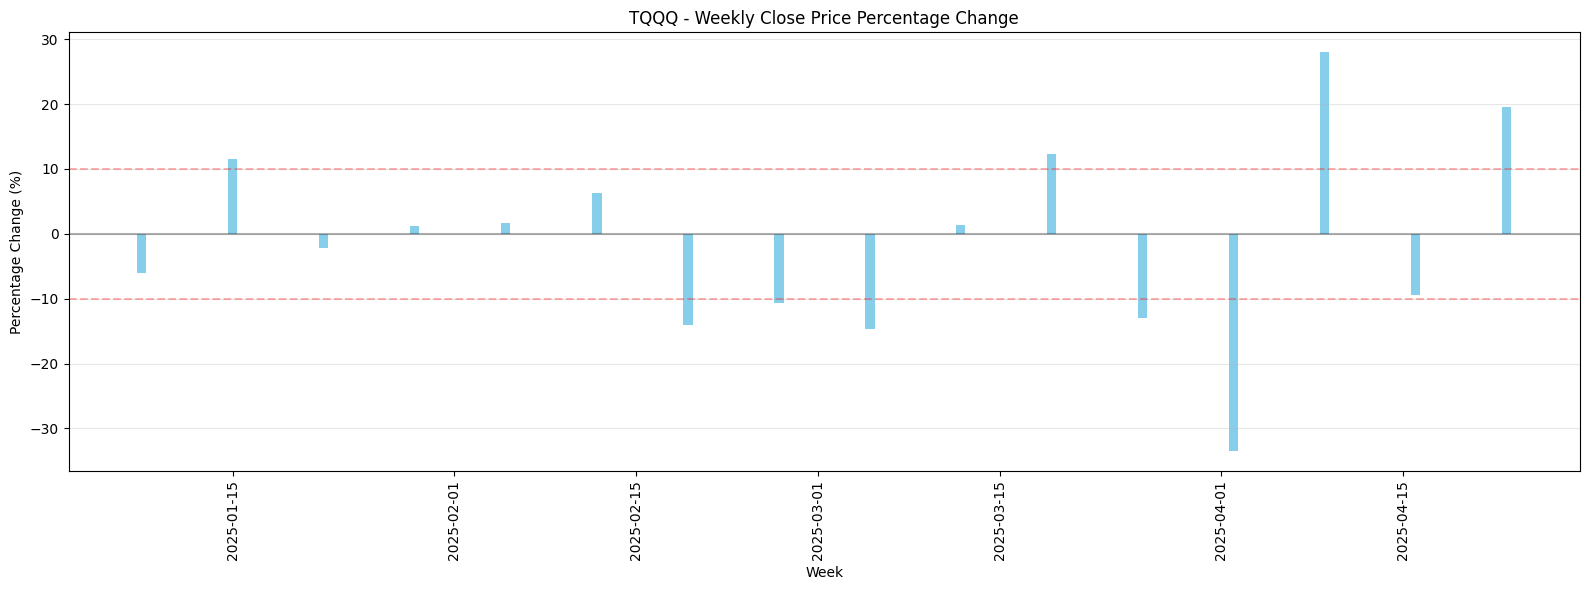

In [34]:
# Use the already calculated CloseDiff for the bar plot
plt.figure(figsize=(16, 6))
plt.bar(history.index, history['CloseDiff'], width=0.7, color='skyblue')

# Add horizontal line at 0%
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=10, color='red', linestyle='--', alpha=0.3)
plt.axhline(y=-10, color='red', linestyle='--', alpha=0.3)

# Format the plot
plt.title(f'{symbol} - Weekly Close Price Percentage Change')
plt.xlabel('Week')
plt.ylabel('Percentage Change (%)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [27]:
from itertools import pairwise

gap = 1 / 60
put_rel_prices = [
  2.3/60,
  3.3/60,
  4.0/60,
  4.5/60,
  5.0/60,
  5.5/60,
  6.0/60,
]

for a,b in pairwise(put_rel_prices):
  print(f'{a:.2%} -> {b:.2%} = {b/a-1:.2%}')

3.83% -> 5.50% = 43.48%
5.50% -> 6.67% = 21.21%
6.67% -> 7.50% = 12.50%
7.50% -> 8.33% = 11.11%
8.33% -> 9.17% = 10.00%
9.17% -> 10.00% = 9.09%


1w:    47%   225%   0.21
2w:    42%   220%   0.19
3w:    67%   197%   0.34
4w:    96%   169%   0.57
5w:   120%   147%   0.81
6w:   125%   156%   0.80
7w:   140%   160%   0.87


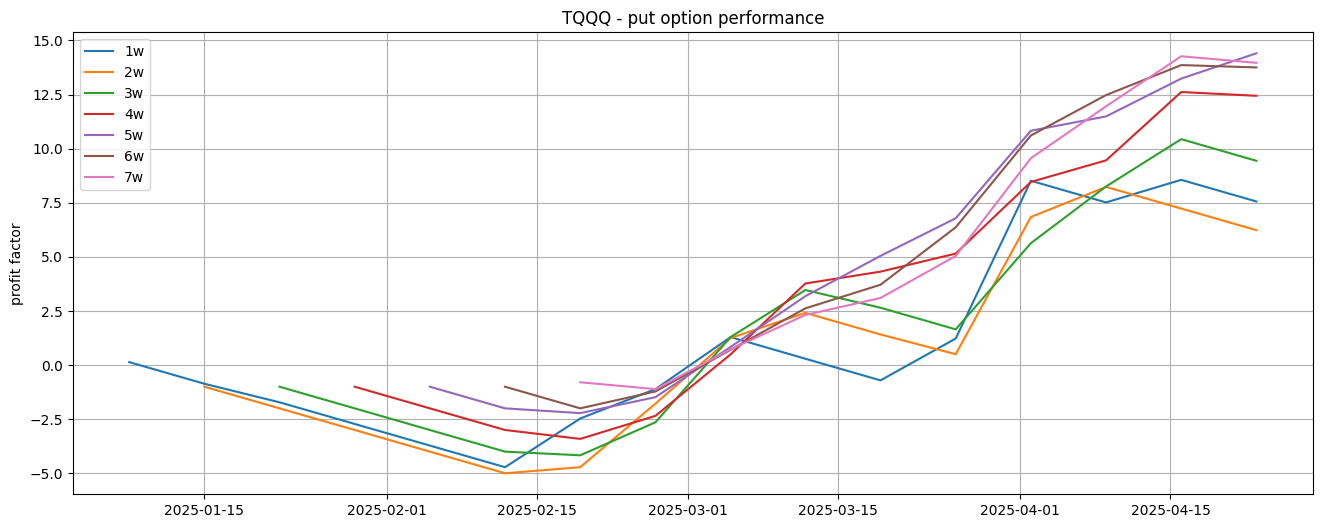

In [28]:
plt.figure(figsize=(16,6))

for w, rel_price in enumerate(put_rel_prices):
    weeks = w + 1
    stock_changes = history['Close'].pct_change(periods=weeks)
    put_profits = ((-stock_changes[weeks:] - gap) / rel_price - 1).clip(lower=-1)
    m = put_profits.mean()
    d = put_profits.std()
    print(f'{weeks}w: {m:6.0%} {d:6.0%} {m/d:6.2f}')

    plt.plot(put_profits.cumsum(), label=f'{weeks}w')

plt.legend(loc='upper left')
plt.title(f'{symbol} - put option performance')
plt.ylabel('profit factor')
# plt.yscale('log')
plt.grid()
plt.show()

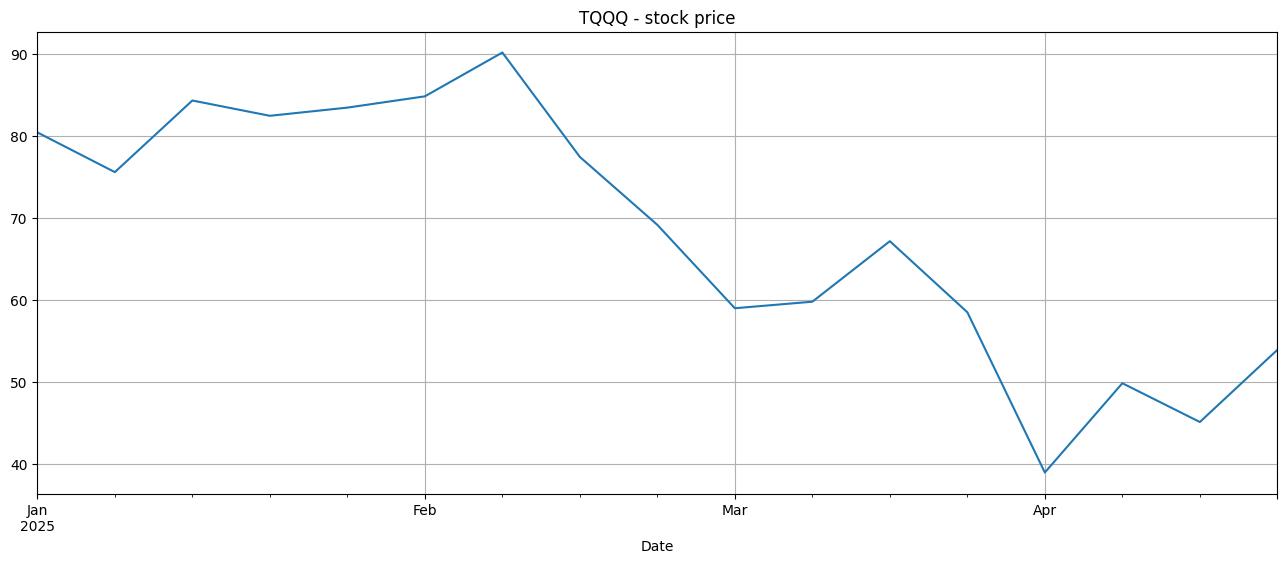

In [29]:
history['Close'].plot(figsize=(16,6))
plt.title(f'{symbol} - stock price')
plt.grid()

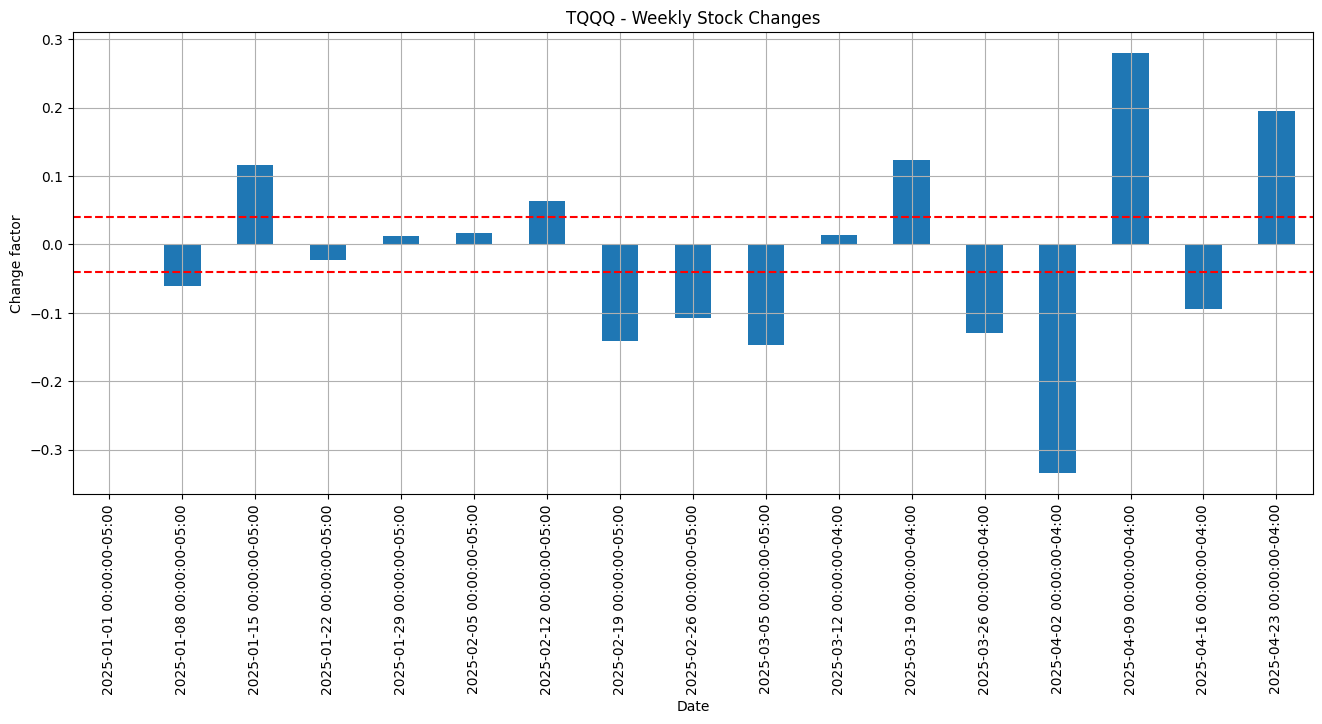

In [30]:
stock_changes = history['Close'].pct_change(periods=1)
stock_changes.plot(kind='bar', figsize=(16,6))
plt.axhline(y=0.04, color='r', linestyle='--')
plt.axhline(y=-0.04, color='r', linestyle='--')
plt.title(f'{symbol} - Weekly Stock Changes')
plt.ylabel('Change factor')
plt.grid()
plt.show()

In [31]:
call_rel_price = [
  2.3/60,
  3.3/60,
  4.0/60,
  4.5/60,
  5.0/60,
  5.5/60,
  6.0/60,
]
display(call_rel_price)

[0.03833333333333333,
 0.055,
 0.06666666666666667,
 0.075,
 0.08333333333333333,
 0.09166666666666666,
 0.1]

1w:    13%   207%   0.06
2w:   -38%    88%  -0.43
3w:   -42%   149%  -0.28
4w:   -82%    42%  -1.94
5w:   -79%    61%  -1.28
6w:   -89%    34%  -2.60
7w:  -100%     0%   -inf


/tmp/ipykernel_87740/3158462712.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  print(f'{weeks}w: {m:6.0%} {d:6.0%} {m/d:6.2f}')


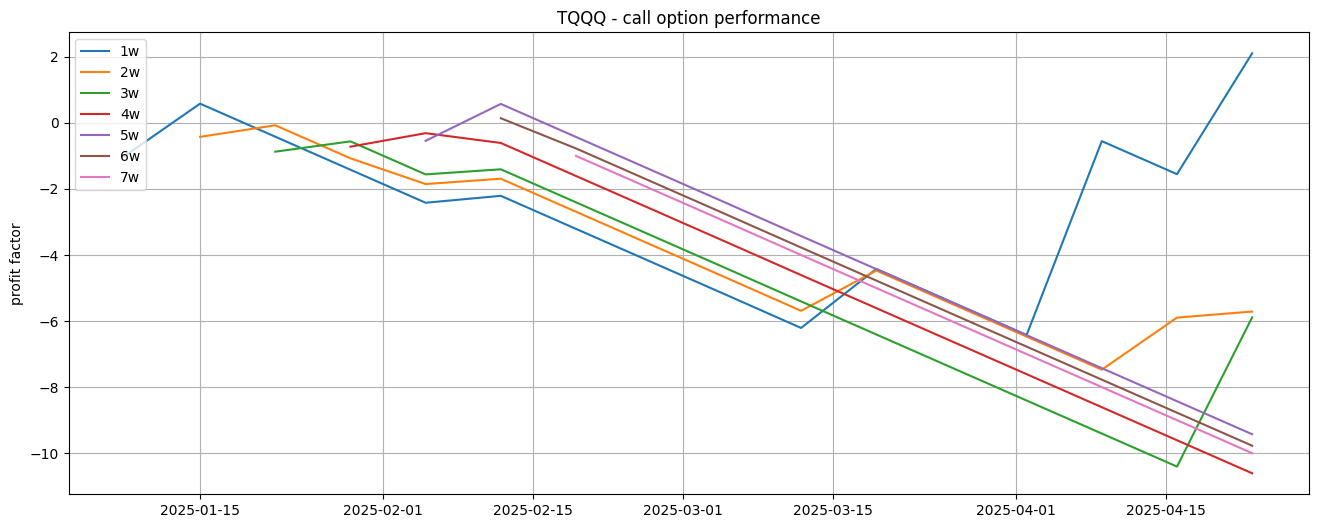

In [32]:

plt.figure(figsize=(16,6))

for w, rel_price in enumerate(put_rel_prices):
    weeks = w + 1
    stock_changes = history['Close'].pct_change(periods=weeks)
    put_profits = ((stock_changes[weeks:] - gap) / rel_price - 1).clip(lower=-1)
    m = put_profits.mean()
    d = put_profits.std()
    print(f'{weeks}w: {m:6.0%} {d:6.0%} {m/d:6.2f}')

    plt.plot(put_profits.cumsum(), label=f'{weeks}w')

plt.legend(loc='upper left')
plt.title(f'{symbol} - call option performance')
plt.ylabel('profit factor')
# plt.yscale('log')
plt.grid()
plt.show()